Grab the Diamond price dataset from Kaggle
https://www.kaggle.com/shivam2503/diamonds/data#__sid=js0

* Use multivariate linear model to see if you can predict diamoond price 
* Use dummy variables for categorical features -- get_dummies
* Determine optimal number of features to predict on
* Try to use polynomial features on at least one column
* Deliberately underfit / overfit thee data and see what happens

# **1. Imports**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# **2. Read and Look at the Data**

In [2]:
df = pd.read_csv('diamonds.csv')

In [3]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
print('shape before drop duplicates:', df.shape)
df.drop_duplicates(inplace=True)
print('shape after drop duplicates:', df.shape)

shape before drop duplicates: (53940, 11)
shape after drop duplicates: (53940, 11)


The data has no missing value and duplicates. The price seems in a reasonable range. So this dataset is already cleaned and ready to analyzed.

# **3. Convert Catergorical Features**

There are three categorical variables: cut, clarity and color. Cut and clarity are suitable for label encoding, and color is suitable for One-Hot encoding.

In [ ]:
# label categorical variables
#cuts = {'Ideal':0,'Premium':1,'Very Good':2,'Good':3,'Fair':4}
#colors = dict(zip('DEFGHIJ',range(7)))
#clarity = {'SI2':5, 'SI1':4, 'VS1':2, 'VS2':3, 'VVS2':1, 'VVS1':0, 'I1':6, 'IF':7}

In [ ]:
#df['cut_n'] = df['cut'].apply(lambda x: cuts[x])
#df['color_n'] = df['color'].apply(lambda x: colors[x])
#df['clarity_n'] = df['clarity'].apply(lambda x: clarity[x])

In [6]:
# using get_dummies
df = pd.get_dummies(df, columns=['cut','clarity','color'],drop_first=True)    # Drop a level. The dropped level color_D is the baseline.
df

,Unnamed: 0,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,color_E,color_F,color_G,color_H,color_I,color_J
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,3,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,4,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,5,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
53936,53937,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
53937,53938,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
53938,53939,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0


# **4. Spliting Dataset**

In [9]:
#df1 = df.drop(['cut','clarity'],axis=1)

In [11]:
# define x and y
X = df.drop('price',axis=1)
y = df['price']

In [12]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=101)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(36139, 23) (17801, 23) (36139,) (17801,)


# **5. Model**
## **5.1 Baseline Model-Linear Regression**

In [13]:
# training model
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# model evaluation
reg.intercept_

459.99250246759675

In [15]:
coef_df1 = pd.DataFrame(reg.coef_, X.columns, columns = ['coefficient'])
coef_df1

,coefficient
carat,11146.094812
depth,-39.445947
table,-26.639040
x,-866.018602
y,76.918211
z,-315.845796
cut_Good,536.737941
cut_Ideal,806.203023
cut_Premium,743.175800
cut_Very Good,689.134647


In [ ]:
# add the t-test and p values

In [16]:
# prediction from model
y_pred = reg.predict(X_test)
y_pred

array([2186.41414443, 4835.67295142, -143.73932923, ..., 5524.1542947 ,
       1987.09163636, 6941.23878012])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


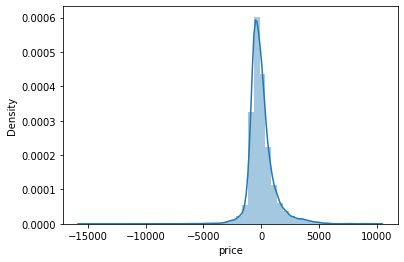

In [17]:
sns.distplot((y_test-y_pred), bins=50)

The residuals follow normal distribution.

In [31]:
# evaluation on the test set
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 747.1960203581892
MSE: 1287032.791155851
RMSE: 1134.4746762955315


## **5.2 Feature Selection**

**Correlation Matrix**

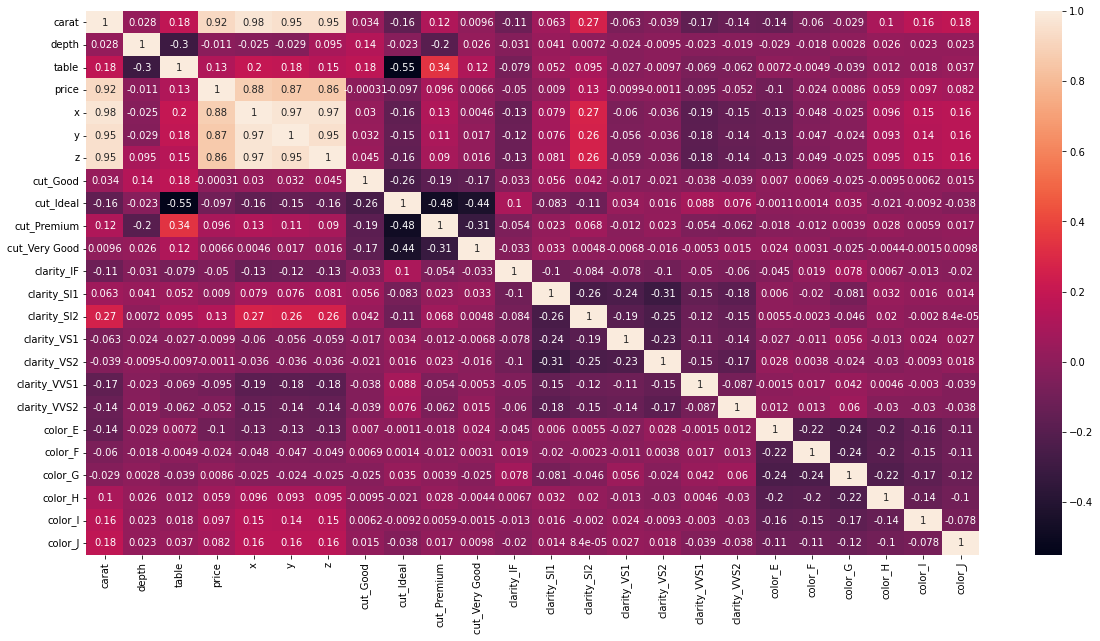

In [19]:

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

I use two rules to do the feature selection: 

1. Avoid multicollinearity. Remove the features that are highly correlated with other features.

2. Remove the unimportant features based on the correlation between the feature and the response.

From this correlation matrix, I noticed that x, y, z, and carat are highly correlated with one another. So I drop x, y, z from the model. cut_Good, cut_Very Good, clarity_IF, clarity_VS1, clarity_VS2 and color_G are also dropped due to it has low correlation with price.

In [20]:
X_train1 = X_train.drop(['x','y','z', 'cut_Good','cut_Very Good', 'clarity_IF','clarity_VS1','clarity_VS2', 'color_G'],axis=1)
X_test1 = X_test.drop(['x','y','z', 'cut_Good','cut_Very Good', 'clarity_IF','clarity_VS1','clarity_VS2','color_G'],axis=1)
parsimonious_reg = LinearRegression()
parsimonious_reg.fit(X_train1,y_train)
print('The intercept for this regression is:',parsimonious_reg.intercept_)
coef_df1 = pd.DataFrame(parsimonious_reg.coef_, X_train1.columns, columns = ['coefficient'])
print('The coefficients for this regression are:\n',coef_df1)
y_pred2 = parsimonious_reg.predict(X_test1)
print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test,y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred2)))

The intercept for this regression is: 5838.404010151316
The coefficients for this regression are:
               coefficient
carat         8632.506400
depth          -84.465878
table          -53.642821
cut_Ideal      211.349977
cut_Premium    135.760221
clarity_SI1   -644.689251
clarity_SI2  -1530.385336
clarity_VVS1   697.346359
clarity_VVS2   659.290544
color_E         55.410078
color_F        -19.287453
color_H       -668.660874
color_I      -1103.782141
color_J      -1960.333342
MAE: 834.3308925295319
MSE: 1671211.81988372
RMSE: 1292.7535804954168


##**5.3 Polynomial Regression**

In [21]:

polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                        ("linear_regression", linear_regression)])
# pipeline.fit(X_train[:, np.newaxis], y_train)
pipeline.fit(X_train, y_train)

    # Evaluate the models using crossvalidation
    #scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             #scoring="neg_mean_squared_error", cv=10)

Pipeline(memory=None,
         steps=[('polynomial_features',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('linear_regression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [23]:
y_pred3 = pipeline.predict(X_test)

In [24]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test,y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred3)))

MAE: 437.3602250846415
MSE: 12404864.486820403
RMSE: 3522.0540153183915


# **6. Underfit and Overfit**

In [26]:
#Underfit: use only two features to build the model
X_train2 = X_train[['carat','table']]  
X_test2 = X_test[['carat','table']]
underfit_reg = LinearRegression()
underfit_reg.fit(X_train2,y_train)
y_pred4 = underfit_reg.predict(X_test2)
print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test,y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred4)))

MAE: 998.1706830457671
MSE: 2364229.785523639
RMSE: 1537.6052112046314


The RMSE of this underfit model is bigger than the original one because the model only uses 2 features. It failed to capture the pattern of the data.

In [27]:
# Overfit: 
polynomial_features = PolynomialFeatures(degree=3, include_bias=False)
linear_regression = LinearRegression()
overfit_reg = Pipeline([("polynomial_features", polynomial_features),
                        ("linear_regression", linear_regression)])
# pipeline.fit(X_train[:, np.newaxis], y_train)
overfit_reg.fit(X_train, y_train)
y_pred5 = overfit_reg.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test,y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred5)))

MAE: 11016.516660561374
MSE: 957377629937.8491
RMSE: 978456.7593602944


The RMSE of this overfit model is much bigger than the original one. Because the model is very complex, it captures the pattern in the training data, but it has bad generalization ability.

# **7. Result Summary**

In [28]:
print('RMSE of baseline model is: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('RMSE of parsimonious model is: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred2)))
print('RMSE of polynomial model is: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred3)))


RMSE of baseline model is:  1134.4746762955315
RMSE of parsimonious model is:  1292.7535804954168
RMSE of polynomial model is:  3522.0540153183915
